Self Study Session
Programming paradigms

## Exercise C.1 UML fact checker
Which of the following can be answered with Yes and which with No:

1.  No two universities can have the same name?
    Nein. Name wird nicht eindeutig markiert.

2.  A university and a student can not have the same name?
    Nein. Keine Bedingung verbindet Namen mit Klassen.

3.  No student studies at more than one university?
    Ja. Ein Student gehöhrt zu einer Universität im UML.

4.  Each student studies at at least one university?
    Ja. Student ist Teil von einer Universität. 

5.  Two students with the same name can not study at the same university?
    Nein. Da kein unique bei Student.name.

6.  Two students with the same name can not study at different universities?
    Nein.

7.  Two universities can have the same address?
    Ja.

Is there a way to specify a attribute in UML as unique?
Ja, das kann man in UML angeben.
Ein Attribut kann mit einem Constraint als eindeutig markiert werden, zum Beispiel:

name: String {unique}

In [1]:
from IPython.display import SVG, display
display(SVG(filename="../images/Selfstudy_C2.svg"))



In [2]:
## Exercise C.3 (From UML to Python)

class Person:
    def __init__(self, name, phone_number, email):
        self.name = name
        self.phone_number = phone_number
        self.email = email


class Student(Person):
    def __init__(self, name, phone_number, email, study_id, average_grade):
        super().__init__(name, phone_number, email)
        self.study_id = study_id
        self.average_grade = average_grade

    def enlist_for_class(self, class_name):
        print(f"{self.name} enrolled in {class_name}.")


class Professor(Person):
    def __init__(self, name, phone_number, email):
        super().__init__(name, phone_number, email)

    def receive_salary(self, amount):
        print(f"{self.name} received salary: {amount} EUR.")


class Address:
    def __init__(self, street, city, area_code, country):
        self.street = street
        self.city = city
        self.area_code = area_code
        self.country = country
        self.occupant = None  # 0..1 person

    def verify_as_home_address(self, person):
        if self.occupant is None:
            self.occupant = person
            return True
        return False

    def print_for_post_service(self):
        return f"{self.street}, {self.area_code} {self.city}, {self.country}"


# --- simple test ---
s1 = Student("Max Mustermann", "0664-123456", "max@mail.com", "S12345", 1.7)
p1 = Professor("Dr. Huber", "0664-987654", "huber@mail.com")

a1 = Address("Hauptstrasse 10", "Innsbruck", "6020", "Austria")
a2 = Address("Universitaetsstrasse 1", "Innsbruck", "6020", "Austria")

print(a1.verify_as_home_address(s1))  # True
print(a1.verify_as_home_address(p1))  # False (already occupied)

print(a1.print_for_post_service())
s1.enlist_for_class("Software Design")
p1.receive_salary(4200)


True
False
Hauptstrasse 10, 6020 Innsbruck, Austria
Max Mustermann enrolled in Software Design.
Dr. Huber received salary: 4200 EUR.


start_food= 0 -> cat died after 10 feedings
start_food=10 -> cat died after 15 feedings
start_food=20 -> cat died after 17 feedings
start_food=30 -> cat died after 51 feedings
start_food=40 -> cat died after 64 feedings


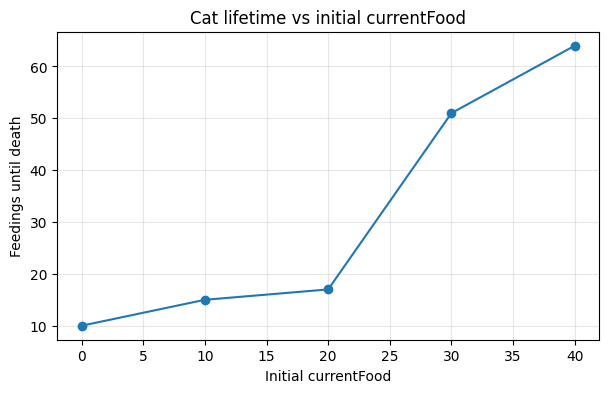

In [3]:
## Exercise C.4 (Interface)

from abc import ABC, abstractmethod
import random
import matplotlib.pyplot as plt


class FourLegged(ABC):
    @abstractmethod
    def run(self, destination):
        pass


class OxygenBreather(ABC):
    @abstractmethod
    def breath(self):
        pass


class Animal:
    def __init__(self, lives: int, currentFood: int):
        self.lives = lives
        self.currentFood = currentFood

    def eat(self, food: int):
        self.currentFood += food


class Cat(Animal, FourLegged, OxygenBreather):
    def __init__(self, currentFood: int = 0):
        super().__init__(lives=7, currentFood=currentFood)

    def run(self, destination):
        # einfache Implementierung fürs Interface
        return f"Cat runs to {destination}"

    def breath(self):
        # einfache Implementierung fürs Interface
        return "Cat breathes oxygen"

    def getLivesLeft(self):
        return self.lives

    def getCurrentAmountofFood(self):
        return self.currentFood

    def decreaseLives(self):
        if self.lives > 0:
            self.lives -= 1

    def eat(self, food: int):
        super().eat(food)
        if self.currentFood < 0:
            self.decreaseLives()
            self.currentFood = 0


def simulate_until_death(initial_food: int, seed: int = 42):
    random.seed(seed)
    cat = Cat(currentFood=initial_food)

    steps = 0
    life_history = [cat.getLivesLeft()]
    food_history = [cat.getCurrentAmountofFood()]

    while cat.getLivesLeft() > 0:
        food = random.randint(-10, 10)
        cat.eat(food)
        steps += 1
        life_history.append(cat.getLivesLeft())
        food_history.append(cat.getCurrentAmountofFood())

    return steps, life_history, food_history


# verschiedene Startwerte testen
initial_values = [0, 10, 20, 30, 40]
results = []

for start_food in initial_values:
    steps, life_hist, food_hist = simulate_until_death(start_food, seed=42)
    results.append((start_food, steps))
    print(f"start_food={start_food:>2} -> cat died after {steps} feedings")

# Plot: Startwert vs. Anzahl Feedings bis Tod
x = [r[0] for r in results]
y = [r[1] for r in results]

plt.figure(figsize=(7, 4))
plt.plot(x, y, marker="o")
plt.title("Cat lifetime vs initial currentFood")
plt.xlabel("Initial currentFood")
plt.ylabel("Feedings until death")
plt.grid(True, alpha=0.3)
plt.show()


In [4]:
## Exercise C.5 (Iterators)

square = lambda a: a ** 2
iterator = map(square, range(1, 5))

for i in iterator:
    print(i)

print(f"{list(iterator) = }")
iterator = map(square, range(1, 5))
print(f"{list(iterator) = }")
#`map(...)` liefert einen Iterator. Ein Iterator kann nur einmal vollständig durchlaufen werden.
#Darum gibt die for-Schleife zuerst 1, 4, 9, 16 aus und verbraucht den Iterator.
#Beim ersten `list(iterator)` danach ist er leer (`[]`).
#Nach dem Neuerstellen mit `iterator = map(...)` enthält `list(iterator)` wieder `[1, 4, 9, 16]`.


1
4
9
16
list(iterator) = []
list(iterator) = [1, 4, 9, 16]


In [5]:
## Exercise C.6 (Accumulator)

from itertools import accumulate, repeat
from operator import add, mul

# aus dem Skript
print(f"{list(accumulate([1, 2, 3, 4, 5], add)) = }")
print(f"{list(accumulate([1, 2, 3, 4, 5], mul)) = }")

# 1) running maximum
numbers = [3, 1, 4, 2, 8, 5, 9, 0]
running_max = list(accumulate(numbers, lambda a, b: a if a > b else b))
print(f"{running_max = }")

# 2) amortization schedule
# balance update: +5% interest, then -100 payment
update = lambda balance, payment: round(balance * 1.05) - payment
schedule = list(accumulate(repeat(100, 10), update, initial=1000))
print(f"{schedule = }")


list(accumulate([1, 2, 3, 4, 5], add)) = [1, 3, 6, 10, 15]
list(accumulate([1, 2, 3, 4, 5], mul)) = [1, 2, 6, 24, 120]
running_max = [3, 3, 4, 4, 8, 8, 9, 9]
schedule = [1000, 950, 898, 843, 785, 724, 660, 593, 523, 449, 371]


In [6]:
## Exercise C.7 (Filter)

# 1) Palindrome in einer Liste finden
words = ["level", "python", "radar", "haus", "otto", "test", "anna"]
palindromes = list(filter(lambda w: w == w[::-1], words))
print(f"{palindromes = }")

# 2) Anzahl der Vokale in einem String
text = "Software Design macht heute richtig Sinn"
vowels = "aeiouAEIOU"
vowel_count = len(list(filter(lambda ch: ch in vowels, text)))
print(f"{vowel_count = }")


palindromes = ['level', 'radar', 'otto', 'anna']
vowel_count = 12


In [7]:
##Exercise C.8 (Creating a module)
# Test im Notebook

import calendar_tools as ct

print(ct.is_leap_year(2024))      # True
print(ct.is_leap_year(2025))      # False

print(ct.day_of_week(15, 2, 2026))  # Sunday
print(ct.week_number(15, 2, 2026))  # 7


True
False
Sunday
7


In [8]:
##Exercise C.9 (Using the module)
# Notebook-Test für C.9

import importlib
import calendar_tools as ct

importlib.reload(ct)  # wichtig nach Änderungen im Modul

# Einzelwerte
d, m, y = ct.parse_date("15/02/2026", style="EU")
print(ct.is_leap_year(y))
print(ct.day_of_week(d, m, y))
print(ct.week_number(d, m, y))

# Alles in einem Dictionary
print(ct.date_info("15/02/2026", style="EU"))
print(ct.date_info("02/15/2026", style="US"))


False
Sunday
7
{'leapyear': False, 'weekday': 'Sunday', 'week': 7}
{'leapyear': False, 'weekday': 'Sunday', 'week': 7}
